# Analyse en Composantes Principales (ACP) avec Python

## Mastère ESD - Introduction au Machine Learning

## Librairies utilisées

Données sur des iris [à télécharger](https://fxjollois.github.io/donnees/Iris.txt)

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## Données utilisées

In [2]:
iris = pandas.read_table("https://fxjollois.github.io/donnees/Iris.txt", sep = "\t")
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris2 = iris.drop("Species", axis = 1)
iris2.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Réalisation de l'ACP

In [4]:
pca = PCA(n_components = 4)
pca.fit(scale(iris2))

PCA(n_components=4)

## Calcul des valeurs propres

In [5]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[2.93808505 0.9201649  0.14774182 0.02085386]
[0.72962445 0.22850762 0.03668922 0.00517871]


In [7]:
eig = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(iris2.shape[1])], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : numpy.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,2.938085,73.0,73.0
1,Dim2,0.920165,23.0,96.0
2,Dim3,0.147742,4.0,99.0
3,Dim4,0.020854,1.0,100.0


## Choix du nombre de facteurs


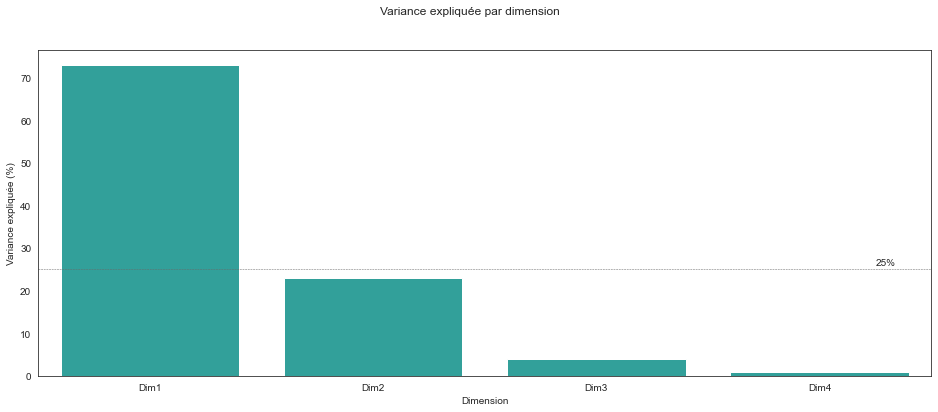

In [8]:
plt.figure(figsize=(16, 6))
g_eig = seaborn.barplot(x = "Dimension", 
                        y = "% variance expliquée",
                        palette = ["lightseagreen"],
                        data = eig)
plt.text(3.25, 26, "25%")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

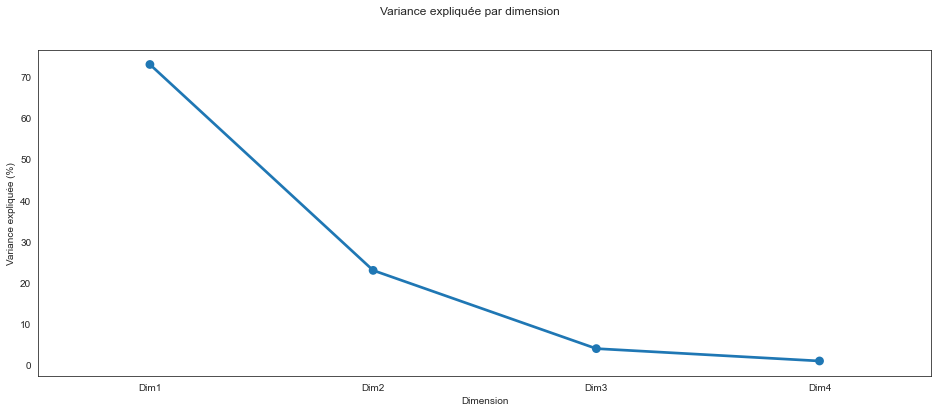

In [9]:
plt.figure(figsize=(16, 6))
g_eig = seaborn.pointplot(x = "Dimension", 
                          y = "% variance expliquée",
                          data = eig)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

## Visualisation du nuage de points

In [22]:
iris_pca_df = pandas.DataFrame(pca.transform(iris2), 
                               columns = ["Dim" + str(i+1) for i in range(iris2.shape[1])]) \
                    .assign(Species = iris.Species)
iris_pca_df.head()

,Dim1,Dim2,Dim3,Dim4,Species
0,2.640270,5.204041,-2.488621,0.117033,setosa
1,2.670730,4.666910,-2.466898,0.107536,setosa
2,2.454606,4.773636,-2.288321,0.104350,setosa
3,2.545517,4.648463,-2.212378,0.278417,setosa
4,2.561228,5.258629,-2.392226,0.155513,setosa


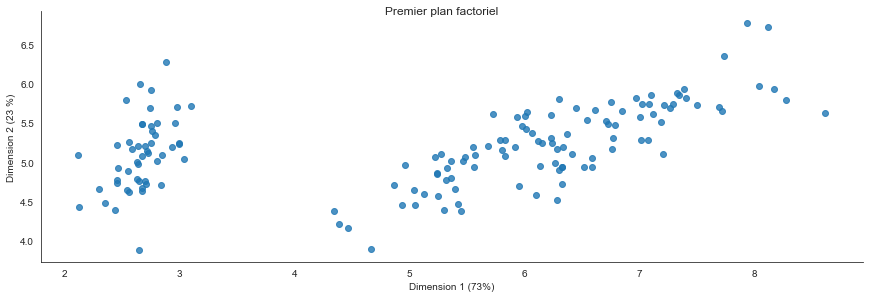

In [23]:
g_pca = seaborn.lmplot(x = "Dim1", y = "Dim2", data = iris_pca_df, fit_reg = False, 
                       height = 4, aspect = 3)
g_pca.set(xlabel = "Dimension 1 (73%)", ylabel = "Dimension 2 (23 %)")
g_pca.fig.suptitle("Premier plan factoriel")

plt.show()

## Représentation des variables

In [24]:
coordvar = pca.components_.T * numpy.sqrt(pca.explained_variance_)
coordvar_df = pandas.DataFrame(coordvar, 
                               columns = ["Dim" + str(i+1) for i in range(iris2.shape[1])], 
                               index = iris.columns[:4])
coordvar_df

,Dim1,Dim2,Dim3,Dim4
Sepal Length,0.893151,0.362039,-0.276581,-0.037732
Sepal Width,-0.461684,0.885673,0.093934,0.017836
Petal Length,0.994877,0.023494,0.054629,0.115736
Petal Width,0.968212,0.064214,0.243797,-0.075612


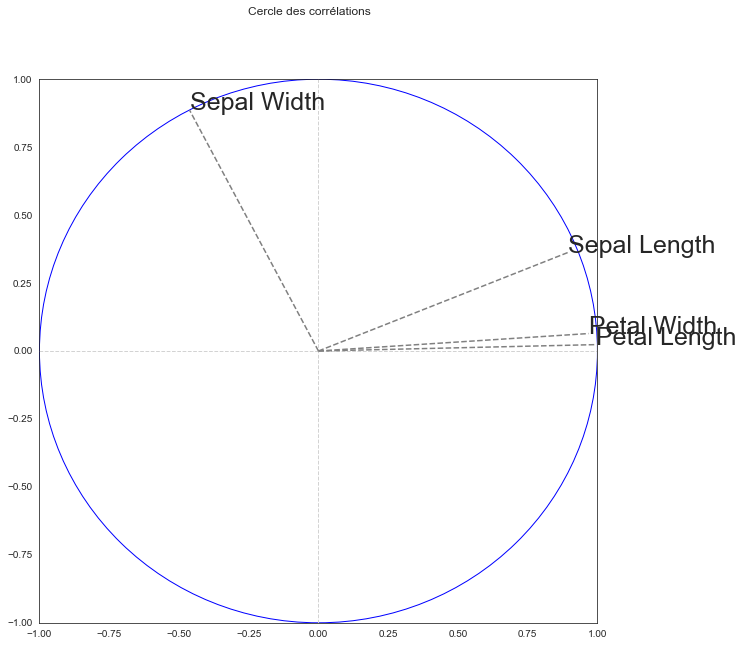

In [25]:
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
for j in range(4):
    axes.text(coordvar_df["Dim1"][j],coordvar_df["Dim2"][j], coordvar_df.index[j], size = 25)
    axes.plot([0,coordvar_df["Dim1"][j]], [0,coordvar_df["Dim2"][j]], color = "gray", linestyle = 'dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

## Représentation simultanée

Analyse conjointe des deux nuages (individus et variables)

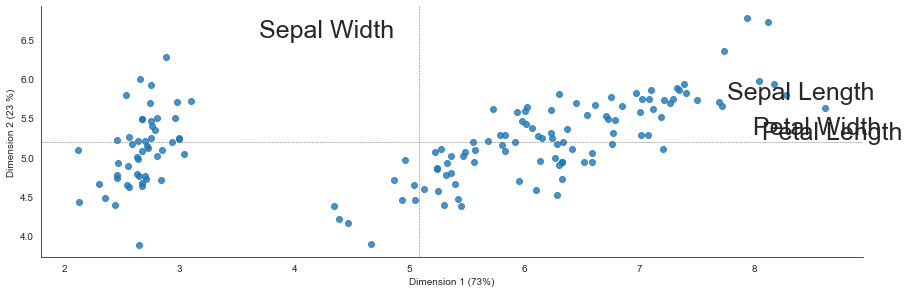

In [26]:
g_pca = seaborn.lmplot(x = "Dim1", y = "Dim2", data = iris_pca_df, fit_reg = False, 
                       height = 4, aspect = 3)
g_pca.set(xlabel = "Dimension 1 (73%)", ylabel = "Dimension 2 (23 %)")
axes = g_pca.axes[0,0]
for j in range(4):
    axes.text(coordvar_df["Dim1"][j] * 3 + iris_pca_df.Dim1.mean(),
              coordvar_df["Dim2"][j] * 1.5 + iris_pca_df.Dim2.mean(), 
              coordvar_df.index[j], size = 25)
plt.axvline(x = iris_pca_df.Dim1.mean(), linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = iris_pca_df.Dim2.mean(), linewidth = .5, color = "dimgray", linestyle = "--")

plt.show()

## Visualisation des espèces sur le premier plan factoriel

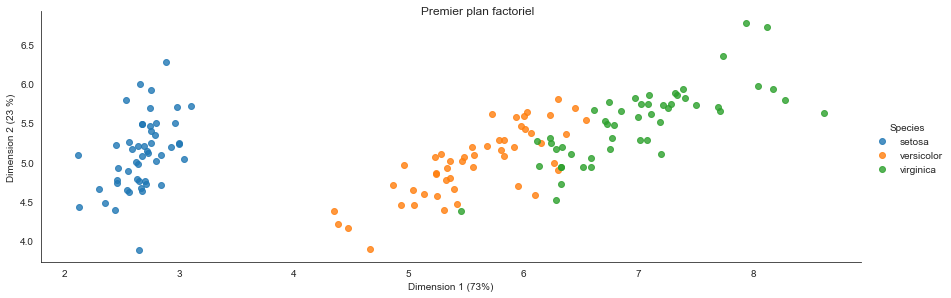

In [27]:
g_pca = seaborn.lmplot(x = "Dim1", y = "Dim2", hue = "Species", data = iris_pca_df, fit_reg = False, 
                       height = 4, aspect = 3)
g_pca.set(xlabel = "Dimension 1 (73%)", ylabel = "Dimension 2 (23 %)")
g_pca.fig.suptitle("Premier plan factoriel")

plt.show()

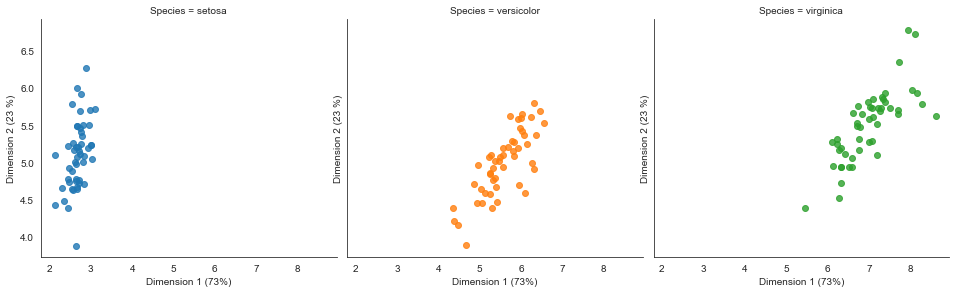

In [28]:
g_pca2 = seaborn.lmplot(x = "Dim1", y = "Dim2", hue = "Species", col = "Species", 
                        data = iris_pca_df, fit_reg = False,
                        height = 4, aspect = 1.1)
g_pca2.set(xlabel = "Dimension 1 (73%)", ylabel = "Dimension 2 (23 %)")
g_pca.fig.suptitle("Premier plan factoriel")

plt.show()